In [9]:
import cv2
from os.path import isfile, join
import numpy as np
import dlib
import glob, os
from imutils import paths
from sklearn.manifold import TSNE
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
face_rec_model_path='models/dlib_face_recognition_resnet_model_v1.dat'
predictor_path = 'models/landmarks.dat'

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)
dataset = os.path.join('c:/', 'Coding', '5_FaceSVM', 'dataset')

In [21]:
imagePaths = list(paths.list_images(dataset))
features = []

for (i, imagePath) in enumerate(imagePaths):
    name = imagePath.split(os.path.sep)[-1]
    image = cv2.imread(imagePath)
    img = cv2.normalize(image, None, 20, 230, cv2.NORM_MINMAX)

    # Ask the detector to find the bounding boxes of each face
    dets = detector(img, 1)  # 0 means no upsample, 1 means 1 time upsample i.e. bigger image, more faces
    clear_output(wait=True)
    print(f'{name}: {format(len(dets))}', flush=True)

    # Now process each face we found.
    for k, d in enumerate(dets):
        # print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        #    k, d.left(), d.top(), d.right(), d.bottom()))
        
        shape = sp(img, d) # Get the landmarks/parts for the face in box d.
        
        # Compute the 128D vector that describes the face in img identified by
        # shape.  In general, if two face descriptor vectors have a Euclidean
        # distance between them less than 0.6 then they are from the same
        # person, otherwise they are from different people.
        features.append(facerec.compute_face_descriptor(img, shape))
        
features = np.array(features)
print(f'{i} images embedded')

natis9.jpg: 1
88 images embedded


In [22]:
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(features)

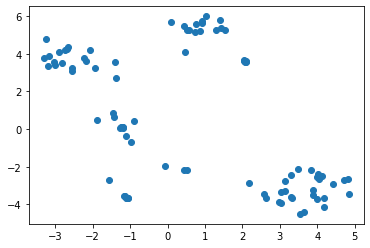

In [23]:
plt.scatter(x = reduced[:,0], y=reduced[:,1])
plt.show()